In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# **Exploratory data analysis**

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [4]:
df=train.loc[:,['MSZoning','Id']]

***Number of houses sold by different features***

Text(0.5, 1.0, 'Number of houses by MSZoning')

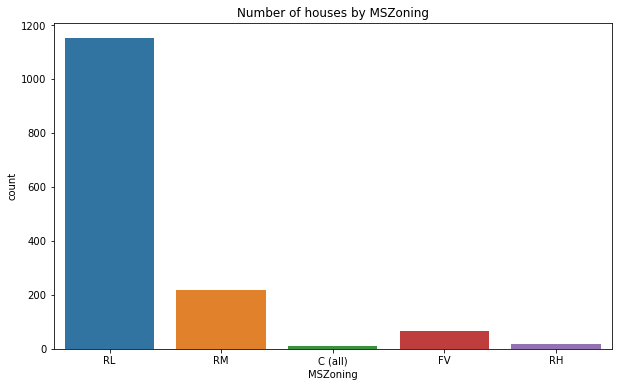

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
ax=sns.countplot(x='MSZoning',data=df)
plt.title('Number of houses by MSZoning')

Text(0.5, 1.0, 'Number of houses by neighborhood')

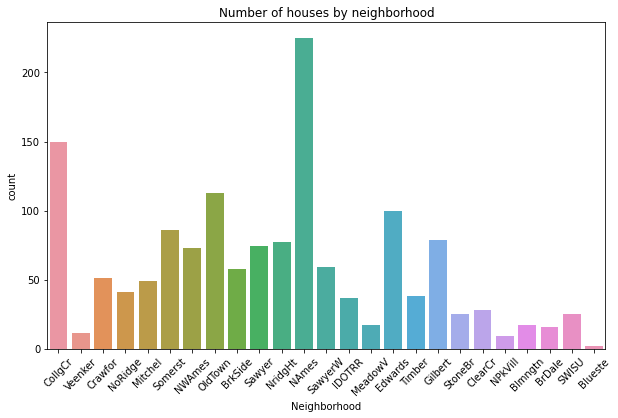

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df=train.loc[:,['Neighborhood','Id']]
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Neighborhood',data=df)
plt.xticks(rotation=45)
plt.title('Number of houses by neighborhood')


Text(0.5, 1.0, 'Number of houses by Overall conditions')

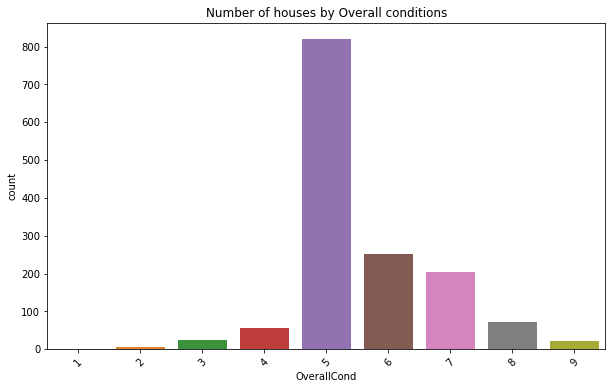

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df=train.loc[:,['OverallCond','Id']]
plt.figure(figsize=(10,6))
ax=sns.countplot(x='OverallCond',data=df)
plt.xticks(rotation=45)
plt.title('Number of houses by Overall conditions')

Text(0.5, 1.0, 'Number of houses by overall qualities')

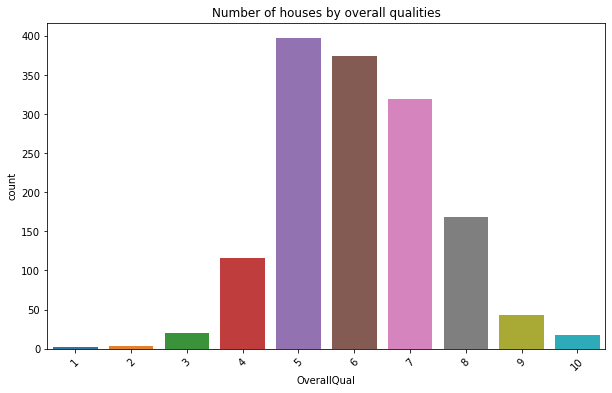

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df=train.loc[:,['OverallQual','Id']]
plt.figure(figsize=(10,6))
ax=sns.countplot(x='OverallQual',data=df)
plt.xticks(rotation=45)
plt.title('Number of houses by overall qualities')

Text(0.5, 1.0, 'Evolution of number of sales per year')

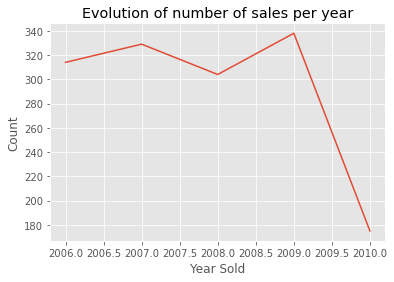

In [9]:
plt.style.use('ggplot')
df=train.loc[:,['YrSold','Id']].groupby('YrSold').count()
plt.plot(df.index,df['Id'])
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.title('Evolution of number of sales per year')

Text(0.5, 1.0, 'Evolution of number of sales per year')

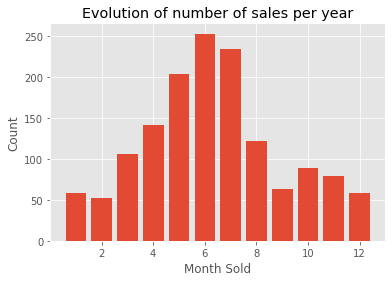

In [10]:
plt.style.use('ggplot')
df=train.loc[:,['MoSold','Id']].groupby('MoSold').count()
plt.bar(df.index,df['Id'])
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.title('Evolution of number of sales per year')

In [ ]:
train.columns

Text(0.5, 1.0, 'Number of houses by overall qualities')

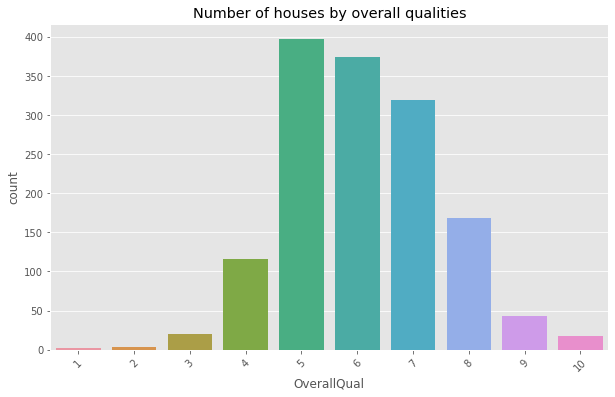

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df=train.loc[:,['OverallQual','Id']]
plt.figure(figsize=(10,6))
ax=sns.countplot(x='OverallQual',data=df)
plt.xticks(rotation=45)
plt.title('Number of houses by overall qualities')

# **Creating a categorical variable that describe the range of the price contained on the dataset**

In [12]:

def transition(x):
    if x<=50000:
        return '34K-50K'
    elif x<=100000:
        return'50K-100K'
    elif x<=150000:
        return '100K-150K'
    elif x<=200000:
        return '150K-200K'
    elif x<=250000:
        return '200K-250K'
    elif x<=300000:
        return '250K-300K'
    elif x<=350000:
        return '300K-350K'
    elif x<=400000:
        return '350K-400K'
    elif x>400000:
        return '400-'
    

In [13]:
train['RangePrice']=pd.DataFrame(map(transition,train['SalePrice']))

Text(0.5, 1.0, 'Number of houses by the range of price')

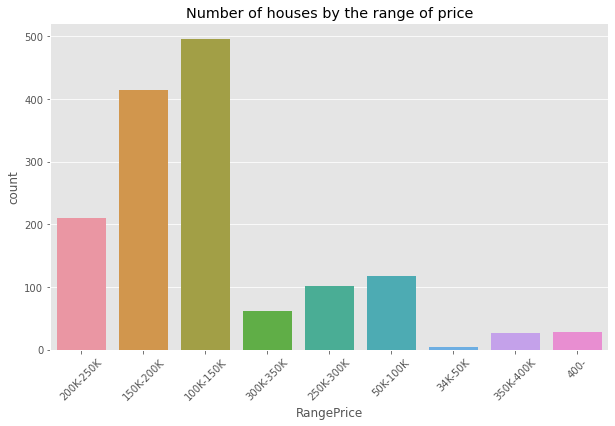

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt 
df=train.loc[:,['RangePrice','Id']]
plt.figure(figsize=(10,6))
ax=sns.countplot(x='RangePrice',data=df)
plt.xticks(rotation=45)
plt.title('Number of houses by the range of price')

Text(0.5, 1.0, 'Evolution of number of sales per year')

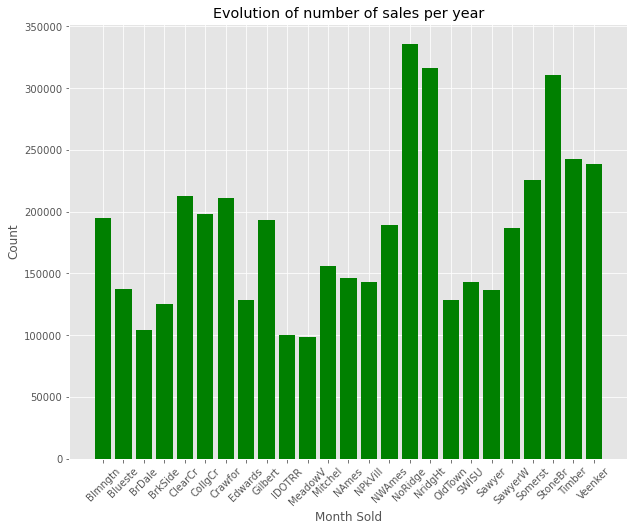

In [15]:
df=train.loc[:,['Neighborhood','SalePrice']].groupby('Neighborhood').mean()
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.bar(df.index,df['SalePrice'], color='green')
plt.xlabel('Month Sold')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Evolution of number of sales per year')

In [16]:
dataframe=train.loc[:,['Neighborhood','RangePrice','Id']].groupby(['Neighborhood','RangePrice']).count()
dataframe.reset_index(inplace=True)
DF=dataframe.groupby(['Neighborhood']).max()
DF['RangePrice']

Neighborhood
Blmngtn    250K-300K
Blueste    150K-200K
BrDale      50K-100K
BrkSide     50K-100K
ClearCr    300K-350K
CollgCr         400-
Crawfor     50K-100K
Edwards     50K-100K
Gilbert    350K-400K
IDOTRR      50K-100K
MeadowV     50K-100K
Mitchel     50K-100K
NAmes       50K-100K
NPkVill    150K-200K
NWAmes      50K-100K
NoRidge         400-
NridgHt         400-
OldTown     50K-100K
SWISU       50K-100K
Sawyer      50K-100K
SawyerW     50K-100K
Somerst         400-
StoneBr         400-
Timber     350K-400K
Veenker    350K-400K
Name: RangePrice, dtype: object

* # **Feature enginnering** 

*Coding the categorical variables and using the correaltion as a criteria to choose the good features (pointbiserial for the categorical and the correlation for the numerical variable*

In [17]:
from sklearn.preprocessing import LabelEncoder
coder=LabelEncoder()
coder.fit(train['Neighborhood'])
train['Neighborhood_Num']=pd.DataFrame(coder.transform(train['Neighborhood']))
test['Neighborhood_Num']=pd.DataFrame(coder.transform(test['Neighborhood']))


In [18]:
from scipy import stats
c,p=stats.pointbiserialr(train['Neighborhood_Num'],train['SalePrice'])
c,p

(0.2108514658223031, 3.906732804258554e-16)

In [19]:
coder=LabelEncoder()
coder.fit(train['MSZoning'])
train['MSZoning_Num']=pd.DataFrame(coder.transform(train['MSZoning']))


In [20]:
from scipy import stats
c,p=stats.pointbiserialr(train['MSZoning_Num'],train['SalePrice'])
c,p

(-0.16687220265320618, 1.4013002757716125e-10)

In [21]:
coder=LabelEncoder()
coder.fit(train['HeatingQC'])
train['HeatingQCl_Num']=pd.DataFrame(coder.transform(train['HeatingQC']))
test['HeatingQCl_Num']=pd.DataFrame(coder.transform(test['HeatingQC']))

In [22]:
from scipy import stats
c,p=stats.pointbiserialr(train['HeatingQCl_Num'],train['SalePrice'])
c,p

(-0.400177543162901, 2.8989275549786403e-57)

In [23]:
coder=LabelEncoder()
train['ExterQual'].fillna('Gd',inplace=True)
coder.fit(train['ExterQual'])
train['ExterQual_Num']=pd.DataFrame(coder.transform(train['ExterQual']))
test['ExterQual_Num']=pd.DataFrame(coder.transform(test['ExterQual']))
c,p=stats.pointbiserialr(train['ExterQual_Num'],train['SalePrice'])
c,p

(-0.6368836943991127, 6.4244677574169624e-167)

In [24]:
coder=LabelEncoder()
train['BsmtQual'].fillna('Gd',inplace=True)
test['BsmtQual'].fillna('TA',inplace=True)
coder.fit(train['BsmtQual'])
train['BsmtQual_Num']=pd.DataFrame(coder.transform(train['BsmtQual']))
test['BsmtQual_Num']=pd.DataFrame(coder.transform(test['BsmtQual']))
c,p=stats.pointbiserialr(train['BsmtQual_Num'],train['SalePrice'])
c,p

(-0.5949453045587045, 1.6754010105026536e-140)

In [25]:
coder=LabelEncoder()
coder.fit(train['Foundation'])
train['Foundation_Num']=pd.DataFrame(coder.transform(train['Foundation']))
c,p=stats.pointbiserialr(train['Foundation_Num'],train['SalePrice'])
c,p

(0.38247899119010187, 4.579865873936533e-52)

In [27]:
train.loc[:,['YearBuilt','YearRemodAdd','GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF','SalePrice']].corr()

,YearBuilt,YearRemodAdd,GarageCars,GarageYrBlt,GrLivArea,TotalBsmtSF,SalePrice
YearBuilt,1.000000,0.592855,0.537850,0.825667,0.199010,0.391452,0.522897
YearRemodAdd,0.592855,1.000000,0.420622,0.642277,0.287389,0.291066,0.507101
GarageCars,0.537850,0.420622,1.000000,0.588920,0.467247,0.434585,0.640409
GarageYrBlt,0.825667,0.642277,0.588920,1.000000,0.231197,0.322445,0.486362
GrLivArea,0.199010,0.287389,0.467247,0.231197,1.000000,0.454868,0.708624
TotalBsmtSF,0.391452,0.291066,0.434585,0.322445,0.454868,1.000000,0.613581
SalePrice,0.522897,0.507101,0.640409,0.486362,0.708624,0.613581,1.000000


#  **Building the model**

*I build three model GradientBoosting , Random Forest and an onther that is a pipeline where a scale the data and reduce the dimensionality and then fit Ridge model (Hyperparameter tuning by grid search)*

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
param_grid={'n_estimators':range(40,81,10),'max_depth':[4,5,6,7,8]}
X=train.loc[:,['YearBuilt','YearRemodAdd','GarageCars','GrLivArea','TotalBsmtSF','OverallQual','ExterQual_Num','BsmtQual_Num','HeatingQCl_Num']]
y=train['SalePrice']
model=GridSearchCV(RandomForestRegressor(),param_grid,n_jobs=-1,cv=5,scoring='neg_root_mean_squared_error')
model.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': range(40, 81, 10)},
             scoring='neg_root_mean_squared_error')

In [29]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 8, 'n_estimators': 60}
-31560.52923635511


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 
param_grid={'n_estimators':range(40,81,10),'max_depth':[4,5,6,7,8]}
model=GridSearchCV(GradientBoostingRegressor(),param_grid,n_jobs=-1,cv=5,scoring='neg_root_mean_squared_error')
model.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': range(40, 81, 10)},
             scoring='neg_root_mean_squared_error')

In [31]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 5, 'n_estimators': 40}
-29325.672724227352


In [32]:
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA 
from sklearn.preprocessing  import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

pipe=Pipeline(steps=[('scaler',StandardScaler()),('reduc',PCA()),('Reg',Ridge())])
param_grid={'reduc__n_components':[3,4,5],'Reg__alpha':[0.1,1,10,100,1000,10000]}

model=GridSearchCV(pipe,param_grid,n_jobs=-1,cv=5,scoring='neg_root_mean_squared_error')
model.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reduc', PCA()), ('Reg', Ridge())]),
             n_jobs=-1,
             param_grid={'Reg__alpha': [0.1, 1, 10, 100, 1000, 10000],
                         'reduc__n_components': [3, 4, 5]},
             scoring='neg_root_mean_squared_error')

In [33]:
print(model.best_params_)
print(model.best_score_)

{'Reg__alpha': 1, 'reduc__n_components': 3}
-36791.266795314616


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y)
dict_model={'RandomForestRegressor':RandomForestRegressor(n_estimators=80,max_depth=8),
           'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=60,max_depth=4),
           'Ridge':Ridge(alpha=10)}

In [35]:
score=list()
for name,model in dict_model.items():
    data_dict=dict()
    model.fit(X_train,y_train)
    #y_predict_train=model.predict(X_train)
    train_score=model.score(X_train, y_train)
    #y_predict_test=model.predict(X_test)
    test_score=model.score(X_test, y_test)
    data_dict['Model']=name
    data_dict['Train_Score']=train_score
    data_dict['Test_Score']=test_score
    score.append(data_dict)

In [36]:
df=pd.DataFrame(score)
df

,Model,Train_Score,Test_Score
0,RandomForestRegressor,0.954897,0.860267
1,GradientBoostingRegressor,0.949831,0.861775
2,Ridge,0.776607,0.842414


In [51]:
X_demanded=test.loc[:,['YearBuilt','YearRemodAdd','GarageCars','GrLivArea','TotalBsmtSF','OverallQual','ExterQual_Num','BsmtQual_Num','HeatingQCl_Num']]
X_demanded['GarageCars'].fillna(int(np.mean(X_demanded['GarageCars'])),inplace=True)
X_demanded['TotalBsmtSF'].fillna(int(np.mean(X_demanded['TotalBsmtSF'])),inplace=True)
model=GradientBoostingRegressor(n_estimators=100,max_depth=5)
model.fit(X,y)
y_demanded=model.predict(X_demanded)


In [56]:
df=pd.DataFrame({'Id':np.array(test['Id']),'SalePrice':y_demanded})
df.to_csv('Result_Prediction.csv',index=False)